In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv(
    './data_sets/lending_club_info.csv', index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [7]:
df = pd.read_csv('./data_sets/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [9]:
df.isnull().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1756
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
dti                         0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
purpose                     0
term                        0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

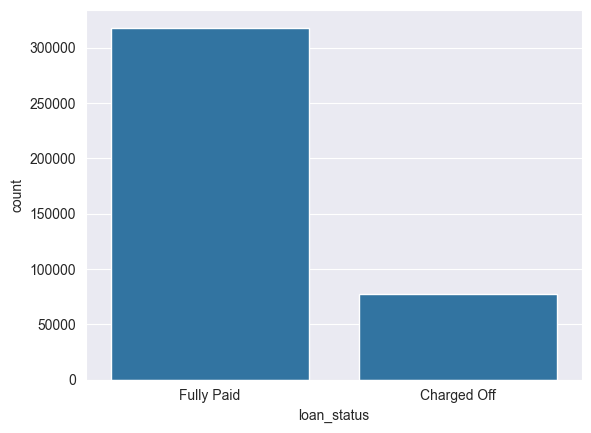

In [10]:
sns.countplot(x='loan_status', data=df)

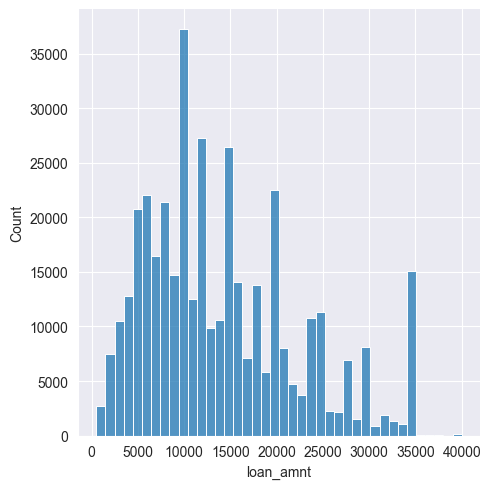

In [11]:
sns.displot(df.loan_amnt, bins=40)

In [12]:
df.corr

<bound method DataFrame.corr of         loan_amnt        term  int_rate  installment grade sub_grade  \
0         10000.0   36 months     11.44       329.48     B        B4   
1          8000.0   36 months     11.99       265.68     B        B5   
2         15600.0   36 months     10.49       506.97     B        B3   
3          7200.0   36 months      6.49       220.65     A        A2   
4         24375.0   60 months     17.27       609.33     C        C5   
...           ...         ...       ...          ...   ...       ...   
396025    10000.0   60 months     10.99       217.38     B        B4   
396026    21000.0   36 months     12.29       700.42     C        C1   
396027     5000.0   36 months      9.99       161.32     B        B1   
396028    21000.0   60 months     15.31       503.02     C        C2   
396029     2000.0   36 months     13.61        67.98     C        C2   

                       emp_title emp_length home_ownership  annual_inc  ...  \
0                      M

In [13]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [14]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

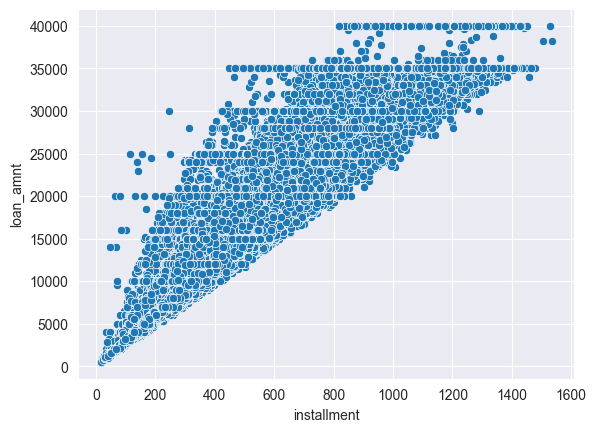

In [15]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

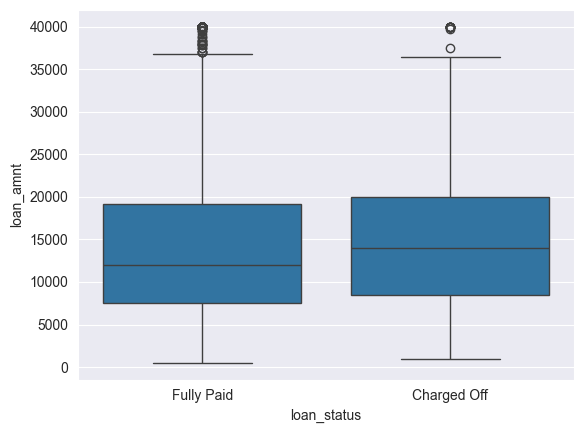

In [16]:
# Boxplot to show the relationship between loan_status and Loan Amount
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [17]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [18]:
df.grade.unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [19]:
df.sub_grade.unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [20]:
feat_info('sub_grade')

LC assigned loan subgrade


<Axes: xlabel='grade', ylabel='count'>

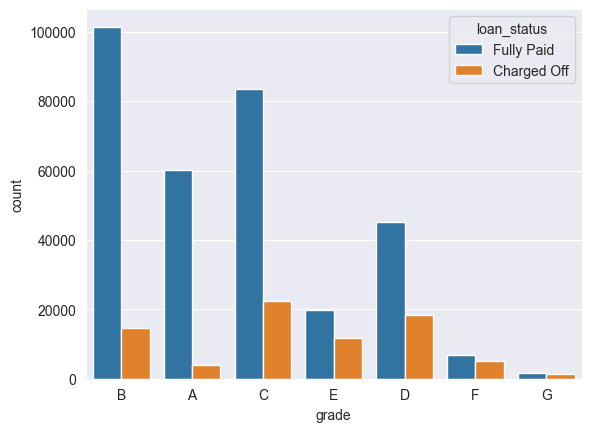

In [21]:
sns.countplot(x='grade', data=df, hue='loan_status')

/tmp/ipykernel_18875/1971366738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette='coolwarm')


<Axes: xlabel='sub_grade', ylabel='count'>

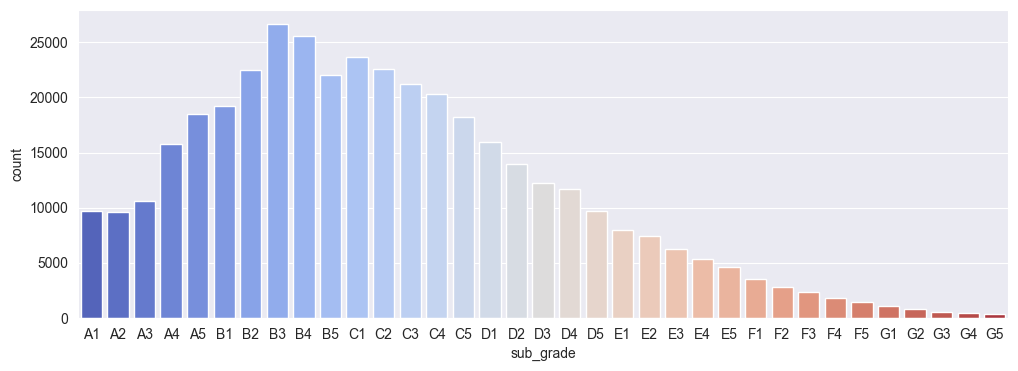

In [22]:
plt.figure(figsize=(12, 4))
subgrade_order = sorted(df.sub_grade.unique())
sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

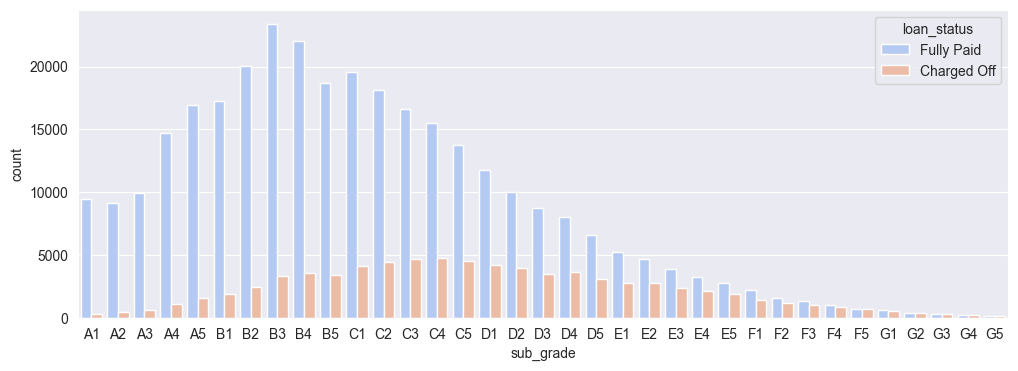

In [23]:
plt.figure(figsize=(12, 4))
sns.countplot(x='sub_grade', data=df, hue='loan_status',
              order=subgrade_order, palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

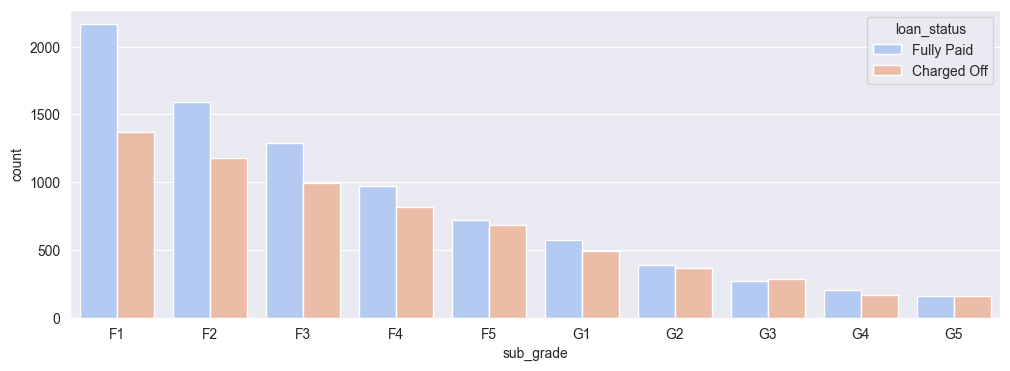

In [24]:
f_and_g = df[(df['grade'] == 'G') | (df['grade'] == 'F')]

plt.figure(figsize=(12, 4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g, hue='loan_status',
              order=subgrade_order, palette='coolwarm')

In [25]:
df['loan_repaid'] = df.loan_status.map({'Fully Paid': 1, 'Charged Off': 0})

In [26]:
df.loan_repaid

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 396030, dtype: int64

In [27]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [28]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [29]:
len(df)

396030

In [30]:
df.isnull().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1756
pub_rec_bankruptcies      535
revol_util                276
dti                         0
address                     0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
loan_amnt                   0
term                        0
purpose                     0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
loan_repaid                 0
dtype: int64

In [31]:
(df.isnull().sum().sort_values(ascending=False) / len(df)) * 100

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443401
pub_rec_bankruptcies    0.135091
revol_util              0.069692
dti                     0.000000
address                 0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
loan_amnt               0.000000
term                    0.000000
purpose                 0.000000
loan_status             0.000000
issue_d                 0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
loan_repaid             0.000000
dtype: float64

In [32]:
feat_info("emp_title")

The job title supplied by the Borrower when applying for the loan.*


In [33]:
df.emp_title.nunique()

173105

In [34]:
df.emp_title.value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [35]:
# Removing emp_title because of their small number and high number of unique values
df = df.drop('emp_title', axis=1)

In [36]:
sorted(df.emp_length.dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [37]:
emp_length_order = [
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years',
]

<Axes: xlabel='emp_length', ylabel='count'>

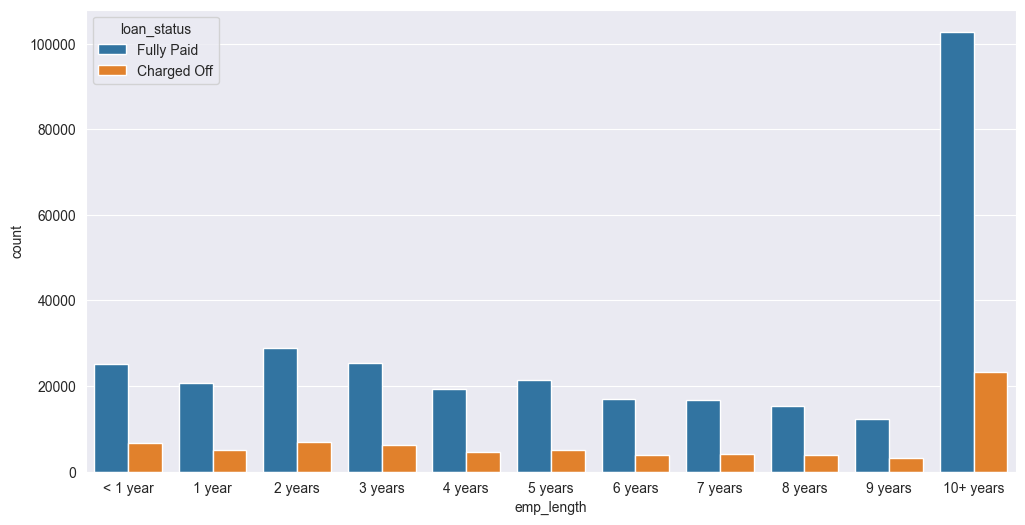

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='emp_length', data=df,
              order=emp_length_order, hue='loan_status')

In [39]:
emp_co = df[df.loan_status == 'Charged Off'].groupby('emp_length').count()[
    'loan_status']

In [40]:
emp_fp = df[df.loan_status == 'Fully Paid'].groupby('emp_length').count()[
    'loan_status']

In [41]:
emp_co/emp_fp

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [42]:
emp_len = emp_co / (emp_co + emp_fp)

<Axes: xlabel='emp_length'>

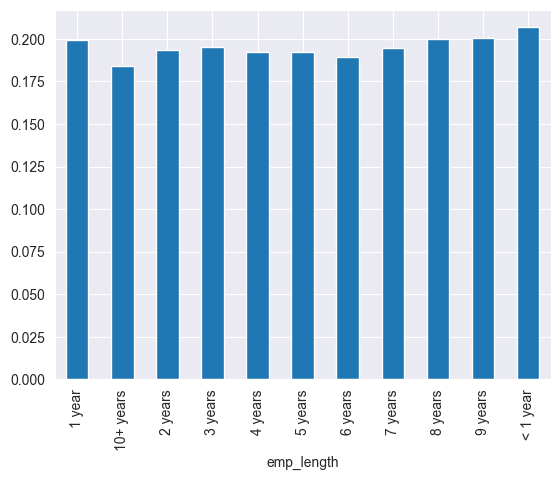

In [43]:
emp_len.plot(kind="bar")

In [44]:
df = df.drop('emp_length', axis=1)

In [45]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [46]:
df.isnull().sum().sort_values(ascending=False)

mort_acc                37795
title                    1756
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
earliest_cr_line            0
address                     0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
dti                         0
term                        0
purpose                     0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
loan_repaid                 0
dtype: int64

In [47]:
df.purpose.head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [48]:
df.title.head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [49]:
df = df.drop('title', axis=1)

In [50]:
feat_info("mort_acc")

Number of mortgage accounts.


In [51]:
df.mort_acc.value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [52]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [53]:
df.groupby('total_acc').mean()['mort_acc']

TypeError: agg function failed [how->mean,dtype->object]